# Monte Carlo sampling with UQpy

We'll be using UQpy's Monte Carlo sampling functionalities. We also use Matplotlib to display results graphically.

Additionally, this demonstration opts to use Numpy's random state management to ensure that results are reproducible between notebook runs.

TODO: add goalsy summary like in `Distributions_Example1.ipynb`/key takeaways

In [83]:
from UQpy.sampling import MonteCarloSampling
import matplotlib.pyplot as plt

from numpy.random import RandomState

## Step-by-step: continuous univariate distribution

First, we import UQpy's normal distribution class.

In [84]:
from UQpy.distributions import Normal

We'll start by constructing two identical standard normal distributions `normal1` and `normal2`.

In [85]:
normal1 = normal2 = Normal()

Next, we'll construct a `MonteCarloSampling` object `mc` to generate random samples following those distributions. Here, we specify an optional initial number of samples `nsamples` to be generated at the object's construction. For the purposes of this demonstration, we also supply a random seed `random_state`.

We access the generated samples via the `samples` attribute.

In [86]:
mc = MonteCarloSampling(distributions=[normal1, normal2],
                        nsamples=5,
                        random_state=RandomState(123))

mc.samples

array([[-1.0856306 ,  1.65143654],
       [ 0.99734545, -2.42667924],
       [ 0.2829785 , -0.42891263],
       [-1.50629471,  1.26593626],
       [-0.57860025, -0.8667404 ]])

To generate more samples on `mc` after construction, we call `mc.run` and once again specify `nsamples`.

In [87]:
mc.run(nsamples=2, random_state=RandomState(23))

mc.samples

array([[-1.0856306 ,  1.65143654],
       [ 0.99734545, -2.42667924],
       [ 0.2829785 , -0.42891263],
       [-1.50629471,  1.26593626],
       [-0.57860025, -0.8667404 ],
       [ 0.66698806, -0.77761941],
       [ 0.02581308,  0.94863382]])

We can transform the samples onto the unit hypercube via applying the probability integral transformation on the samples to yield similar samples from the uniform distribution. We call `mc.transform_u01`, from which results are stored in the `samplesU01` attribute.

In [88]:
mc.transform_u01()

mc.samplesU01

array([[0.13882123, 0.95067527],
       [0.84070157, 0.00761886],
       [0.61140334, 0.3339934 ],
       [0.06599577, 0.89723205],
       [0.28142947, 0.19304213],
       [0.74761012, 0.21839671],
       [0.51029679, 0.82859656]])

We can visualize the (untransformed) samples by plotting them on axes of each distribution's range.

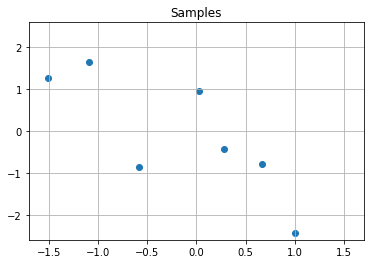

In [89]:
fig, ax = plt.subplots()
plt.title('Samples')

plt.scatter(x = mc.samples[:, 0],
            y = mc.samples[:, 1],
            marker = 'o')

plt.setp(ax, xlim=(-1.7, 1.7), ylim=(-2.6, 2.6))
ax.yaxis.grid(True)
ax.xaxis.grid(True)

As well, we can visualize each distribution's sample densities via histograms.

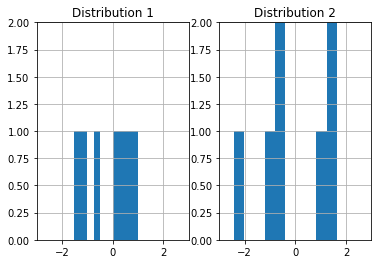

In [90]:
fig, ax = plt.subplots(1, 2)

for i in (0, 1):
    ax[i].set_title('Distribution ' + str(i + 1))
    ax[i].hist(mc.samples[:, i])
    ax[i].yaxis.grid(True)
    ax[i].xaxis.grid(True)

plt.setp(ax, xlim=(-3, 3), ylim=(0, 2));

## Additional examples

### Continuous multivariate distribution

We'll use UQpy's multivariate normal class.

In [91]:
from UQpy.distributions import MultivariateNormal

And we construct a multivariate normal distribution `mvnormal` specifying parameters `mean` with a vector of mean values and `cov` with a covariance matrix.

In [92]:
mvnormal = MultivariateNormal(mean = [1, 2],
                              cov = [[ 4,  -0.9],
                                     [-0.9, 1  ]])

With this distribution, we construct a `MonteCarloSampling` object `mvmc` and generate five samples on construction.

In [93]:
mvmc = MonteCarloSampling(distributions = mvnormal,
                          nsamples = 5,
                          random_state = RandomState(456))

mvmc.samples

array([[ 2.21206564,  1.21635688],
       [-0.09732382,  2.8152297 ],
       [-1.30600471,  4.1038246 ],
       [ 0.50407636,  2.54147535],
       [ 1.61407521,  1.54649951]])

### Mixing a multivariate and a univariate continuous distribution

Here, we use one of our normal distributions and our multivariate normal distribution. Notice how each distribution has its own bundle (array) of samples per run of sampling—even when that bundle contains a single value.

In [94]:
mixedmc = MonteCarloSampling(distributions = [normal1, mvnormal],
                             nsamples = 5,
                             random_state = RandomState(789))

mixedmc.samples

d:\code\uqpy\src\UQpy\sampling\MonteCarloSampling.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.x.append(np.array(y))


array([[array([-1.1081114]), array([2.9781381 , 1.51253378])],
       [array([-0.72571863]), array([1.96173102, 0.89589751])],
       [array([0.52280433]), array([-0.91034353,  3.25303316])],
       [array([1.2344419]), array([-1.75177129,  2.37998095])],
       [array([0.09689585]), array([1.43288471, 1.1029768 ])]],
      dtype=object)

### Mixing a continuous and a discrete distribution

We'll use UQpy's binomial distribution class for our discrete distribution.

In [95]:
from UQpy.distributions import Binomial

With that, we'll construct a binomial distribution `binomial` with five trials `n` and a 40% probability `p` of success per trial.

In [96]:
binomial = Binomial(n=5, p=0.4)

And we construct a `MonteCarloSampling` object `cdmv` with five initial samples using our binomial distribution and one of our normal distributions.

In [97]:
cdmv = MonteCarloSampling(distributions = [binomial, normal1],
                          nsamples = 5,
                          random_state = RandomState(333))

cdmv.samples

array([[[ 2.        ],
        [-0.23549804]],

       [[ 3.        ],
        [-0.37236414]],

       [[ 0.        ],
        [-0.52811698]],

       [[ 1.        ],
        [-0.48079156]],

       [[ 2.        ],
        [ 0.63909145]]])